<a href="https://colab.research.google.com/github/MinaMelek/Percipton-model/blob/master/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
curDir =('/content/gdrive/My Drive/Colab Notebooks/ML course/A1')
!cat /content/gdrive/My\ Drive/Colab\ Notebooks/ML\ course/A1

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
cat: '/content/gdrive/My Drive/Colab Notebooks/ML course/A1': Is a directory


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# Libraries
import numpy as np
import pandas as pd
import cv2
import os
import glob
from scipy import misc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
#curDir = os.getcwd()
TrainPath = os.path.join(curDir, 'Train')
TestPath = os.path.join(curDir, 'Test')
ValidationPath = os.path.join(curDir, 'Validation')
# print(os.listdir(TestPath))


In [0]:
# Read and Sort Train Data
#os.chdir(TrainPath)
#TrainFiles = glob.glob( '*.jpg')
#TrainFiles = sorted(TrainFiles, key=lambda x: int(os.path.splitext(x)[0]))


In [0]:
# Read and Sort data files | No need to change directory
# Train Files
TrainFiles = glob.glob(os.path.join(TrainPath, '*.jpg'))
TrainFiles = sorted(TrainFiles, key=lambda x: int(os.path.splitext(os.path.split(x)[1])[0]))
# Test Files
TestFiles = glob.glob(os.path.join(TestPath, '*.jpg'))
TestFiles = sorted(TestFiles, key=lambda x: int(os.path.splitext(os.path.split(x)[1])[0]))
# Val Files
ValFiles = glob.glob(os.path.join(ValidationPath, '*.jpg'))
ValFiles = sorted(ValFiles, key=lambda x: int(os.path.splitext(os.path.split(x)[1])[0]))

In [0]:
# Checks
print('First 5 files in Train\t', [os.path.split(x)[1]  for x in TrainFiles[:5]])
print('File no. 1395 in Train\t', os.path.split(TrainFiles[1358])[1])
print('Last 5 files in Train\t', [os.path.split(x)[1]  for x in TrainFiles[-5:]])
print('First 5 files in Test\t', [os.path.split(x)[1]  for x in TestFiles[:5]])
print('First 5 files in Valid\t', [os.path.split(x)[1]  for x in ValFiles[:5]])

First 5 files in Train	 ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
File no. 1395 in Train	 1359.jpg
Last 5 files in Train	 ['2396.jpg', '2397.jpg', '2398.jpg', '2399.jpg', '2400.jpg']
First 5 files in Test	 ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
First 5 files in Valid	 ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']


In [0]:
# Read Train data
X_train = []
with open(os.path.join(TrainPath, 'Training Labels.txt'), 'r', encoding='utf-8') as tlabel:
    Y_train = np.array(tlabel.readlines(), dtype='int')
for f in TrainFiles:
    image = cv2.imread(f, 0) / 255 # dividing by 255 for normalization
    #change dimention to 1 dimentional vector instead of (28x28) array
    dim = image.shape #28x28
    image=image.reshape(dim[0]*dim[1],)
    image=np.append(image,1).reshape(dim[0]*dim[1]+1,1)
    X_train.append(image)
data_length = np.prod(dim)+1
# checks
print(Y_train[0:5])
print(len(Y_train))
print(X_train[0].shape)
print(len(X_train))

[0 0 0 0 0]
2400
(785, 1)
2400


In [0]:
# Read Test data
X_test = []
with open(os.path.join(TestPath, 'Test Labels.txt'), 'r', encoding='utf-8') as tlabel:
    Y_test = np.array(tlabel.readlines(), dtype='int')
for f in TestFiles:
    image = cv2.imread(f, 0) / 255 # dividing by 255 for normalization
    #change dimention to 1 dimentional vector instead of (28x28) array
    dim = image.shape #28x28
    image=image.reshape(dim[0]*dim[1],)
    image=np.append(image,1).reshape(dim[0]*dim[1]+1,1)
    X_test.append(image)
# checks
print(len(Y_test))
print(X_test[0].shape)
print(len(X_test))


200
(785, 1)
200


In [0]:
# Read Validation data
beg = time.time()
X_val = []
with open(os.path.join(ValidationPath, 'Validation Labels.txt'), 'r', encoding='utf-8') as tlabel:
    Y_val = np.array(tlabel.readlines(), dtype='int')
for f in ValFiles:
    image = cv2.imread(f, 0) / 255 # dividing by 255 for normalization
    #change dimention to 1 dimentional vector instead of (28x28) array
    dim = image.shape #28x28
    image=image.reshape(dim[0]*dim[1],)
    image=np.append(image,1).reshape(dim[0]*dim[1]+1, 1)
    X_val.append(image)
# checks
print(len(Y_val))
print(X_val[0].shape)
print(len(X_val))
print('time taken to read val is {} sec'.format(time.time()-beg))

200
(785, 1)
200
time taken to read val is 70.95851278305054 sec


In [0]:
# Saving data To use in colab
newpath=os.path.join(curDir,'CompressedData')
if not os.path.exists(newpath):
    os.makedirs(newpath)
np.savez_compressed(os.path.join(newpath,'TrainD'), X_train=X_train, Y_train=Y_train)
np.savez_compressed(os.path.join(newpath,'TestD'), X_test=X_test, Y_test=Y_test)
np.savez_compressed(os.path.join(newpath,'ValD'), X_val=X_val, Y_val=Y_val)

In [0]:
# restore compressed data
path = os.path.join(curDir,'CompressedData')
train = np.load(os.path.join(path, 'TrainD.npz'))
X_train = train['X_train']
Y_train = train['Y_train']
test = np.load(os.path.join(path, 'TestD.npz'))
X_test = test['X_test']
Y_test = test['Y_test']
val = np.load(os.path.join(path, 'ValD.npz'))
X_val = val['X_val']
Y_val = val['Y_val']
dim = [28]*2
data_length = np.prod(dim)+1

In [5]:
# checks 2
print(Y_train[0:5])
print(Y_train[::100])
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)
print(Y_val.shape)
print(X_val.shape)
print(dim)

[0 0 0 0 0]
[0 0 0 1 1 2 2 2 3 3 4 4 5 5 5 6 6 7 7 7 8 8 9 9]
(2400,)
(2400, 785, 1)
(200,)
(200, 785, 1)
(200,)
(200, 785, 1)
[28, 28]


In [0]:
def uniPerceptron(X, Y, eta, epsilon=10^-4):
    W = np.array([1] + [0]*dim[0]*dim[1]).reshape(dim[0]*dim[1]+1, 1) # Weights Initialization
    err = 1
    count = 0
    ### looping until there is no error or number of iterations exceeds 6600 epochs
    while err and count < 3000:# >= epsilon:
        count += 1
        err = 0 ##
        for i in range(len(X)):
            # E = np.dot(W.T, X[i]) * Y[i]
            if np.dot(W.T, X[i]) * Y[i] <= 0:
                Wnxt = W + eta*X[i]*Y[i]
                err = 1 #np.linalg.norm(W-Wnxt)
                W = Wnxt
    return W, count

In [0]:
# Training
TotalWeights = []
with tf.device('/gpu:0'):
  for lr in range(10):
    beg = time.time()
    eta = pow(10, -lr)
    print('Approaching for eta =', eta)
    Weights = []
    for i in range(10):
      ytemp = np.copy(Y_train)
      ytemp[np.argwhere(i==Y_train)] = 1
      ytemp[np.argwhere(i!=Y_train)] = -1
      W_final, c = uniPerceptron(X_train, ytemp, eta)
      Weights.append(W_final)
      print('\tClass {} takes {} iterations to approach'.format(i, c))
    print('Time taken for eta = {} is {} mins\n'.format(eta, (time.time()-beg)/60))
    TotalWeights.append(Weights)

Approaching for eta = 1
	Class 0 takes 108 iterations to approach
	Class 1 takes 112 iterations to approach
	Class 2 takes 452 iterations to approach
	Class 3 takes 595 iterations to approach
	Class 4 takes 361 iterations to approach
	Class 5 takes 735 iterations to approach
	Class 6 takes 133 iterations to approach
	Class 7 takes 256 iterations to approach
	Class 8 takes 878 iterations to approach
	Class 9 takes 1046 iterations to approach
Time taken for eta = 1 is 1.0605233867963155 mins

Approaching for eta = 0.1
	Class 0 takes 108 iterations to approach
	Class 1 takes 112 iterations to approach
	Class 2 takes 471 iterations to approach
	Class 3 takes 594 iterations to approach
	Class 4 takes 359 iterations to approach
	Class 5 takes 713 iterations to approach
	Class 6 takes 133 iterations to approach
	Class 7 takes 252 iterations to approach
	Class 8 takes 937 iterations to approach
	Class 9 takes 1046 iterations to approach
Time taken for eta = 0.1 is 1.0685609380404155 mins

Appr

In [0]:
np.savez_compressed(os.path.join(curDir,'CompressedData','AllWeights'), TotalWeights=TotalWeights)

In [0]:
# Restore Weights
TotalWeights = np.load(os.path.join(curDir,'CompressedData','AllWeights.npz'))['TotalWeights']

In [0]:
def cm_analysis(y_true, y_pred, filename, labels, lr, acc, figsize=(10,10)):
    """
    This function is copied from 'https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7'
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title('Confusion Matrix at eta = 10^{} with accuracy = {}%'.format(-lr, acc))
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

Prediction for eta = 1e+00
	Test accuracy = 83.5%
Prediction for eta = 1e-01
	Test accuracy = 83.0%
Prediction for eta = 1e-02
	Test accuracy = 83.5%
Prediction for eta = 1e-03
	Test accuracy = 81.5%
Prediction for eta = 1e-04
	Test accuracy = 82.5%
Prediction for eta = 1e-05
	Test accuracy = 84.5%
Prediction for eta = 1e-06
	Test accuracy = 87.5%
Prediction for eta = 1e-07
	Test accuracy = 86.0%
Prediction for eta = 1e-08
	Test accuracy = 80.5%
Prediction for eta = 1e-09
	Test accuracy = 77.5%


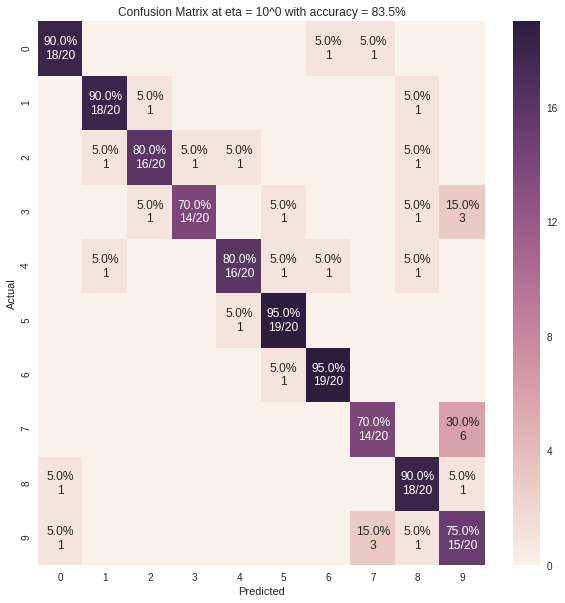

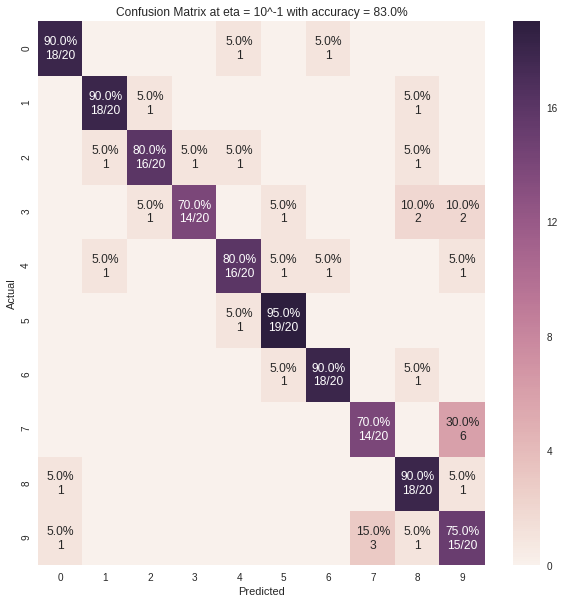

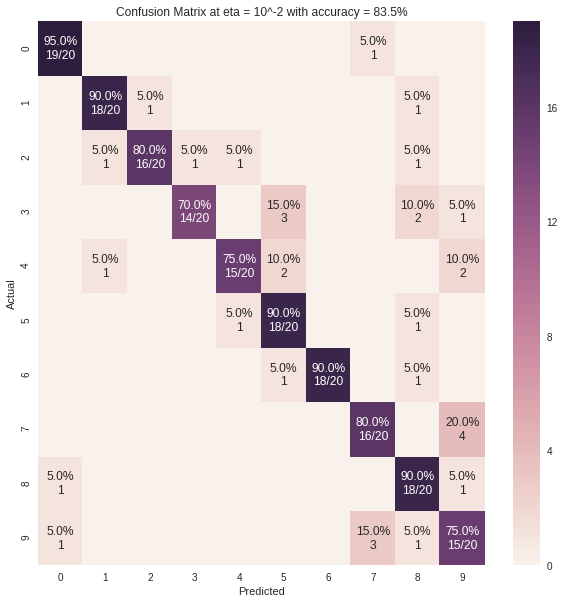

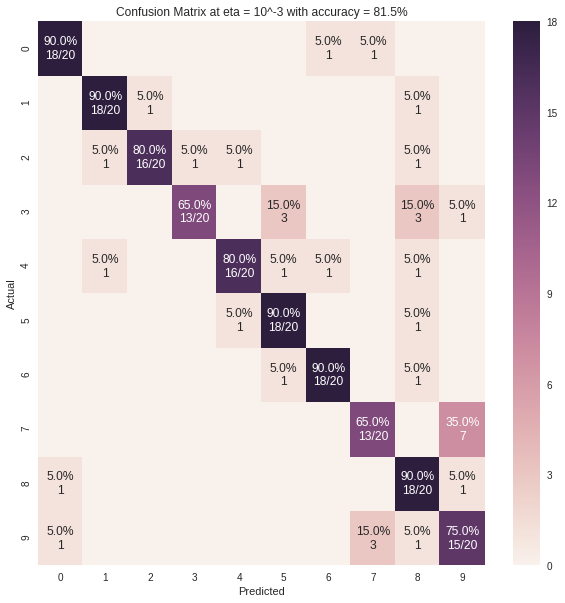

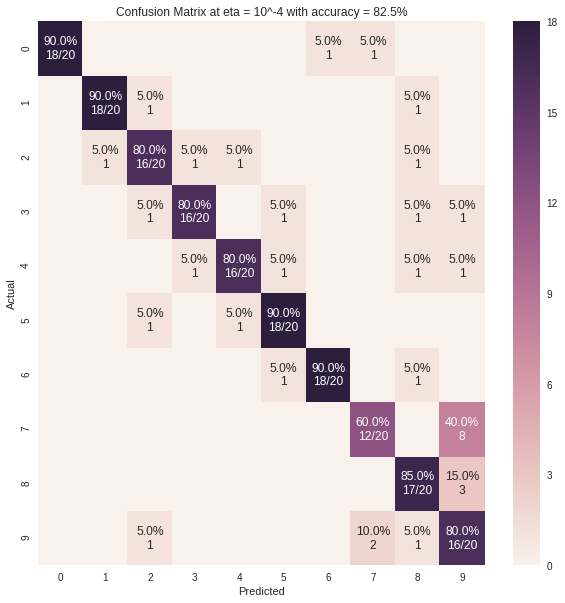

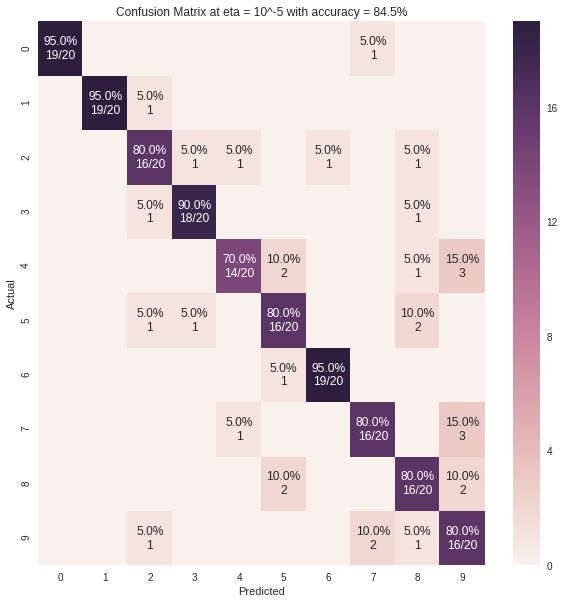

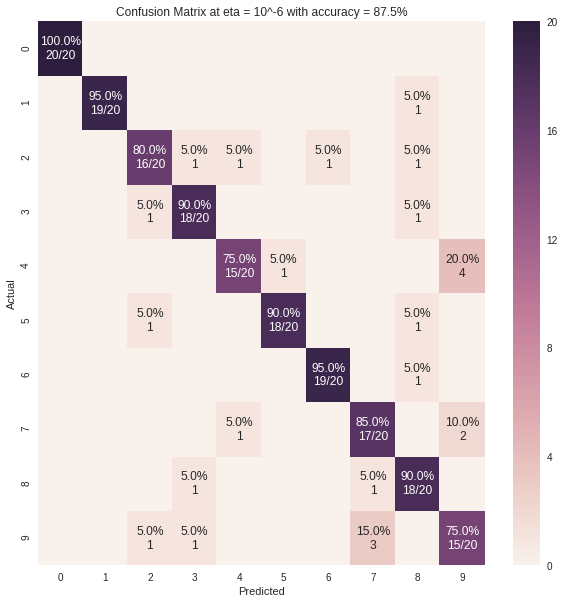

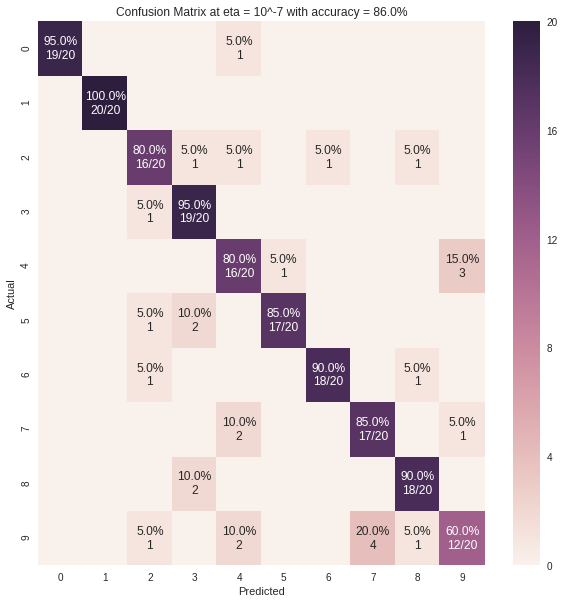

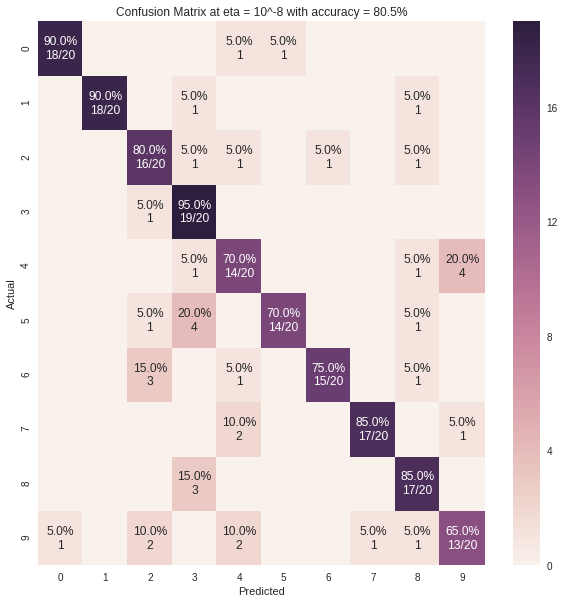

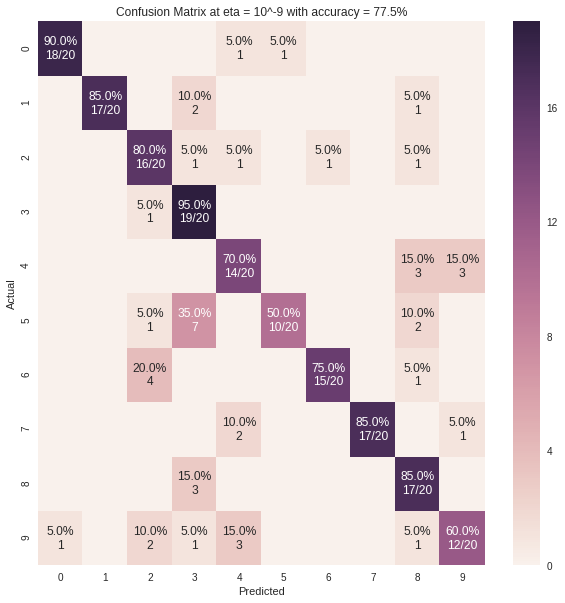

In [0]:
# Testing
newpath=os.path.join(curDir,'F2')
if not os.path.exists(newpath):
    os.makedirs(newpath)
for lr in range(10):
    eta = pow(10, -lr)
    print('Prediction for eta = {:.0e}'.format(eta))
    Y_predicted = []
    Weights = np.copy(TotalWeights[lr])
    for i in range(10):
        W = np.copy(Weights[i])
        Y_predicted.append(np.dot(W.T, X_test))
    Y_predicted = np.array(Y_predicted).argmax(axis=0).reshape(len(Y_test))
    # print(Y_predicted)
    # print(Y_test)
    acc = np.count_nonzero(Y_predicted==Y_test)/len(Y_test)*100
    print('\tTest accuracy = {}%'.format(acc))
    # y_actu = pd.Series(Y_test, name='Actual')
    # y_pred = pd.Series(Y_predicted, name='Predicted')
    # df_confusion = pd.crosstab(y_actu, y_pred)
    # print('\t{}'.format(df_confusion))

    cm_analysis(Y_test, Y_predicted, os.path.join(newpath,'Confusion-{}.jpg'.format(lr)), list(range(10)),lr ,acc)

In [0]:
!pip install numbapro

In [73]:
### Part a ###
X_train = X_train.reshape(X_train.shape[:2])
X_test = X_test.reshape(X_test.shape[:2])
X_val = X_val.reshape(X_val.shape[:2])
print(X_train.shape)
W = np.concatenate((np.ones((10, 1)), np.zeros((10, np.prod(dim)))), axis=1) # Weights Initialization
print(W.shape)
region = np.zeros((len(Y_train), 10))
for i in range(10):
    region[:, i] = np.copy(Y_train)
    region[np.argwhere(i==Y_train), i] = 1
    region[np.argwhere(i!=Y_train), i] = -1
print(region.shape)
inds = (X_train @ W.T) * region # 2400x10
print(inds[-5:])
miss = np.zeros(inds.shape)
miss[np.nonzero(inds<=0)] = region[np.nonzero(inds<=0)]

print(d.shape)
print(d[np.transpose(np.nonzero(d==0))])

(2400, 785)
(10, 785)
(2400, 10)
[[-0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]]
(2400, 10)
[[[ 0. -1. -1. ... -1. -1. -1.]
  [ 1. -1. -1. ... -1. -1. -1.]]

 [[ 0. -1. -1. ... -1. -1. -1.]
  [ 1. -1. -1. ... -1. -1. -1.]]

 [[ 0. -1. -1. ... -1. -1. -1.]
  [ 1. -1. -1. ... -1. -1. -1.]]

 ...

 [[-1. -1. -1. ... -1.  0. -1.]
  [ 1. -1. -1. ... -1. -1. -1.]]

 [[-1. -1. -1. ... -1. -1.  0.]
  [ 1. -1. -1. ... -1. -1. -1.]]

 [[-1. -1. -1. ... -1. -1.  0.]
  [ 1. -1. -1. ... -1. -1. -1.]]]


In [84]:
c = 10.023
print('\tThe 10 classes takes %d iterations to approach' %c)

	The 10 classes takes 10 iterations to approach


In [0]:
### Part a ###
X_train = X_train.reshape(X_train.shape[:2])
X_test = X_test.reshape(X_test.shape[:2])
X_val = X_val.reshape(X_val.shape[:2])
with tf.device('/gpu:0'):
    # Defining the Perceptron function 2
    def uniPerceptron(X, Y, region, eta, n_class=10, dim=[28,28], epsilon=10^-4):
        W = np.concatenate((np.ones((n_class, 1)), np.zeros((n_class, np.prod(dim)))), axis=1) # Weights Initialization
        # W is 10x785 X is 2400x785, Y is 2400x1, region is 2400x10
        err = 1
        count = 0
        Y_new = np.zeros(Y.shape)
        ### looping until there is no error or number of iterations exceeds 6600 epochs
        while (Y_new==Y).sum() != np.prod(Y.shape):# and count < 600:# >= epsilon:
            count += 1
            inds = (X @ W.T) * region # 2400x10
            miss = np.zeros(inds.shape) # 2400x10
            miss[np.nonzero(inds<=0)] = region[np.nonzero(inds<=0)]
            W = W + eta*(miss.T @ X)
            Y_new = (X @ W.T).argmax(axis=1)
    #         W = W - eta * X.T @ (X @ W - Y)
    #         Y_new = X @ W
        return W, count

    # Training 2
    Y_temp = np.zeros((len(Y_train), 10))
    for i in range(10):
        Y_temp[:, i] = np.copy(Y_train)
        Y_temp[np.argwhere(i==Y_train), i] = 1
        Y_temp[np.argwhere(i!=Y_train), i] = -1
    TotalWeights = np.zeros((10, 10, data_length))
    for lr in range(0, 10):
        beg = time.time()
        eta = pow(10, -lr)
        print('Approaching for eta =', eta)
        #Weights = []
        W_final, c = uniPerceptron(X_train, Y_train, Y_temp, eta)
        TotalWeights[lr] = W_final
        print('\tThe 10 classes took %d iterations to approach' %c)
        print('Time taken for eta = {:.0e} is {:.3f} mins\n'.format(eta, (time.time()-beg)/60))
    TotalWeights = np.array(TotalWeights)

    def cm_analysis(y_true, y_pred, filename, labels, lr, acc, figsize=(10,10)):
        """
        This function is copied from 'https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7'
        """
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=labels, columns=labels)
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        fig, ax = plt.subplots(figsize=figsize)
        plt.title('Confusion Matrix at eta = 10^{} with accuracy = {}%'.format(-lr, acc))
        sns.heatmap(cm, annot=annot, fmt='', ax=ax)
        plt.savefig(filename)

    # Testing2
    newpath=os.path.join(curDir,'TestFigurest2leef2')
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for lr in range(5):
        eta = pow(10, -lr)
        print('Prediction for eta = {:.0e}'.format(eta))
        Weights = np.copy(TotalWeights[lr]) # 10x785
        Y_predicted = (X_test @ Weights.T).argmax(axis=1).reshape(len(Y_test))
        acc = np.count_nonzero(Y_predicted==Y_test)/len(Y_test)*100
        print('\tTest accuracy = {}%'.format(acc))

        cm_analysis(Y_test, Y_predicted, os.path.join(newpath,'Confusion-{}.jpg'.format(lr)), list(range(10)),lr ,acc)

(2400, 785)
(2400, 10)
Approaching for eta = 1
	The 10 classes took 1653 iterations to approach
Time taken for eta = 1 is 0.47707417408625286 mins

Approaching for eta = 0.1
	The 10 classes took 1645 iterations to approach
Time taken for eta = 0.1 is 0.4722275892893473 mins

Approaching for eta = 0.01
	The 10 classes took 1532 iterations to approach
Time taken for eta = 0.01 is 0.5307294170061747 mins

Approaching for eta = 0.001
	The 10 classes took 1640 iterations to approach
Time taken for eta = 0.001 is 0.5776007215181986 mins

Approaching for eta = 0.0001
	The 10 classes took 1641 iterations to approach
Time taken for eta = 0.0001 is 0.5756499846776326 mins

Approaching for eta = 1e-05
	The 10 classes took 1617 iterations to approach
Time taken for eta = 1e-05 is 0.5596096634864807 mins

Approaching for eta = 1e-06
	The 10 classes took 5566 iterations to approach
Time taken for eta = 1e-06 is 1.693718636035919 mins

Approaching for eta = 1e-07
	The 10 classes took 54554 iterations

In [0]:
W_final.shape

NameError: ignored

In [0]:
np.savez_compressed(os.path.join(curDir,'CompressedData','AllWeights'), TotalWeights=TotalWeights)

In [0]:
# Restore Weights
TotalWeights = np.load(os.path.join(curDir,'CompressedData','AllWeights.npz'))['TotalWeights']

In [0]:
print(TotalWeights.shape)
TotalWeights = list(TotalWeights)

(6, 785, 10)


Prediction for eta = 1e+00
	Test accuracy = 85.0%
Prediction for eta = 1e-01
	Test accuracy = 87.5%
Prediction for eta = 1e-02
	Test accuracy = 85.0%
Prediction for eta = 1e-03
	Test accuracy = 86.5%
Prediction for eta = 1e-04
	Test accuracy = 86.0%


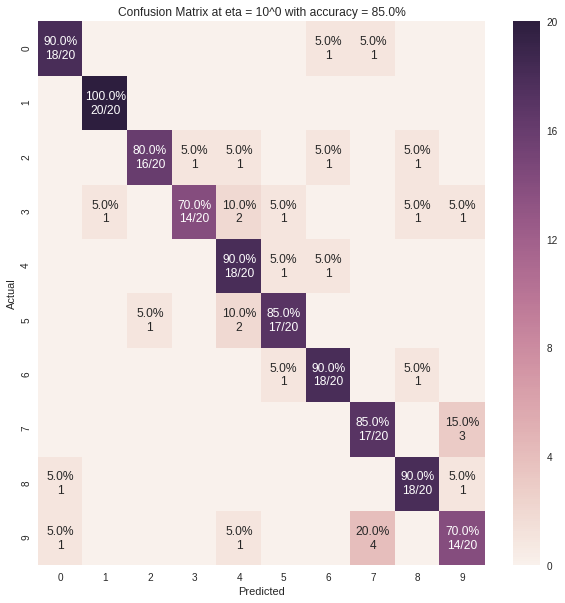

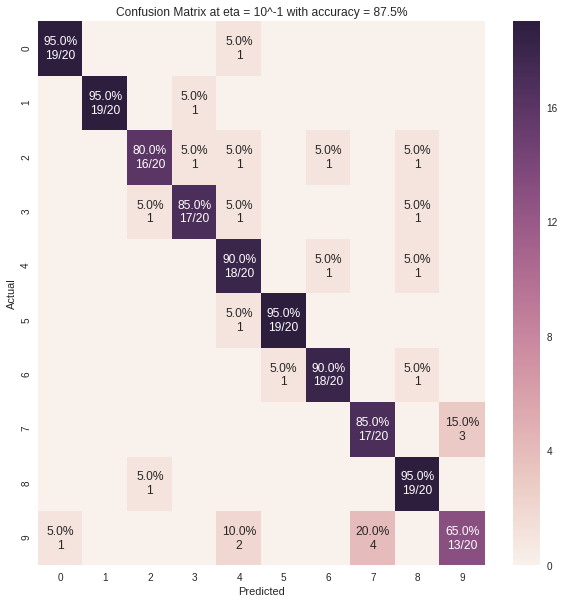

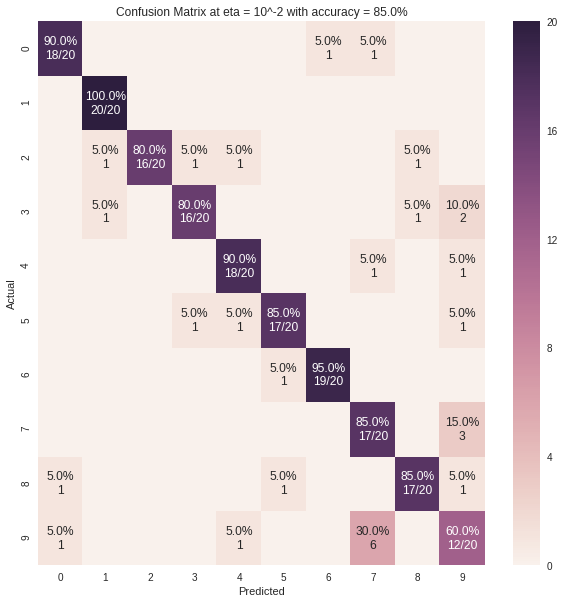

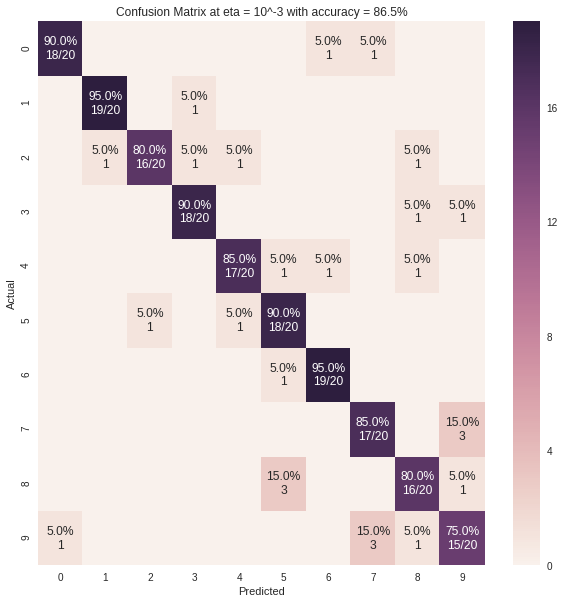

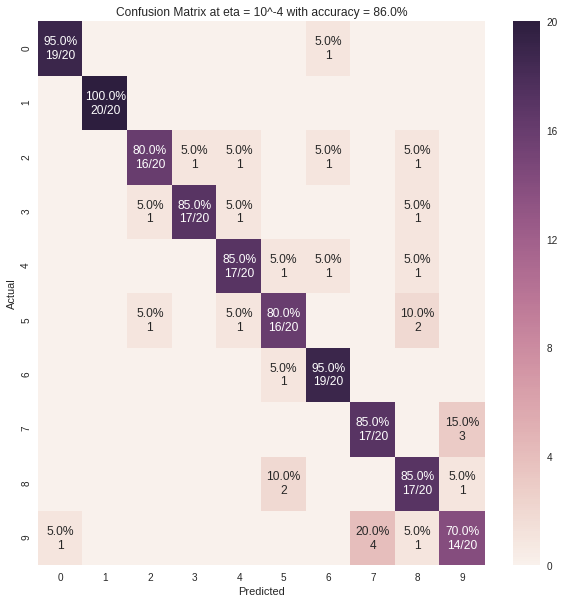

In [0]:
    def cm_analysis(y_true, y_pred, filename, labels, lr, acc, figsize=(10,10)):
        """
        This function is copied from 'https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7'
        """
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=labels, columns=labels)
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        fig, ax = plt.subplots(figsize=figsize)
        plt.title('Confusion Matrix at eta = 10^{} with accuracy = {}%'.format(-lr, acc))
        sns.heatmap(cm, annot=annot, fmt='', ax=ax)
        plt.savefig(filename)

    # Testing2
    newpath=os.path.join(curDir,'TestFigurest2leef2')
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for lr in range(5):
        eta = pow(10, -lr)
        print('Prediction for eta = {:.0e}'.format(eta))
        Weights = np.copy(TotalWeights[lr])
        Y_predicted = np.array(X_test[:,:,0] @ Weights).argmax(axis=1).reshape(len(Y_test))
        acc = np.count_nonzero(Y_predicted==Y_test)/len(Y_test)*100
        print('\tTest accuracy = {}%'.format(acc))

        cm_analysis(Y_test, Y_predicted, os.path.join(newpath,'Confusion-{}.jpg'.format(lr)), list(range(10)),lr ,acc)